![](C:/Users/stefa/AppData/Local/Temp/mu6q6uaz.bmp)

In [51]:
# Base class
import matplotlib.pyplot as plt


class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError


import numpy as np


# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error


# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error


import numpy as np


# activation function and its derivative
def tanh(x):
    return np.tanh(x);


def tanh_prime(x):
    return 1 - np.tanh(x) ** 2;


import numpy as np


# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2));


def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size;


class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            if i % (epochs // 10) == 0:
                print(f'{(i + 1) / epochs * 100}% -> epoch {i + 1}/{epochs}   error={err}')

In [55]:
def function(x: float, y: float) -> float:
    return x ** 2 + y ** 2


x_train = np.array([
    [x]
    for x in np.random.randint(-4, 4, (10, 2))  # 1000 rows and 2 columns of numbers between -4 and 4
])

y_train = np.array([
    [[y]]
    for y in [function(*x1x2[0]) for x1x2 in x_train]
])
# # training data
# x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
# y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# print(x_train)
# print(y_train)

x_shape = 2
inner_shape = 10
y_shape = 1

# network
net = Network()
net.add(FCLayer(x_shape, inner_shape))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(inner_shape, y_shape))

# train
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=1000, learning_rate=0.1)

# test
x_test = np.random.randint(-4, 4, (1000, 2))
y_test = np.array([function(x, y) for x, y in x_test])

out = net.predict(x_test)
print(out)
np.sum(np.abs(out - y_test) < 0.001) / len(y_test)


0.1% -> epoch 1/1000   error=371.2222419046927
10.100000000000001% -> epoch 101/1000   error=5.165723325037397e+59
20.1% -> epoch 201/1000   error=5.443334612548461e+118
30.099999999999998% -> epoch 301/1000   error=4.818862416388926e+177
40.1% -> epoch 401/1000   error=3.7008572434396177e+236
50.1% -> epoch 501/1000   error=3.133403344170452e+295
60.099999999999994% -> epoch 601/1000   error=nan
70.1% -> epoch 701/1000   error=nan


C:\Users\stefa\AppData\Local\Temp\ipykernel_20176\3721814146.py:136: RuntimeWarning: overflow encountered in double_scalars
  err += self.loss(y_train[j], output)
C:\Users\stefa\AppData\Local\Temp\ipykernel_20176\3721814146.py:83: RuntimeWarning: overflow encountered in power
  return np.mean(np.power(y_true - y_pred, 2));
C:\Users\stefa\AppData\Local\Temp\ipykernel_20176\3721814146.py:63: RuntimeWarning: invalid value encountered in multiply
  return self.activation_prime(self.input) * output_error


80.10000000000001% -> epoch 801/1000   error=nan
90.10000000000001% -> epoch 901/1000   error=nan
[array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array([[nan]]), array

0.0

In [ ]:
from mpl_toolkits import mplot3d
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

C:\Users\stefa\AppData\Local\Temp\ipykernel_20176\1186769738.py:24: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


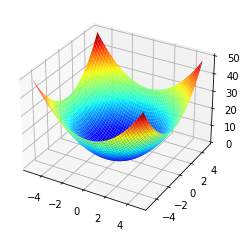

In [56]:

# unimodal test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


# objective function
def objective(x, y):
    return x ** 2.0 + y ** 2.0


# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

In [84]:
import torch
import plotly.graph_objects as go
import numpy as np

# Batch Size, Input Neurons, Hidden Neurons, Output Neurons
N, D_in, H, D_out = 64, 1, 1024, 1

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

print(x.numpy(), y.numpy())

# Use the nn package to define our model
# Linear (Input -> Hidden), ReLU (Non-linearity), Linear (Hidden-> Output)
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# Define the loss function: Mean Squared Error
# The sum of the squares of the differences between prediction and ground truth
loss_fn = torch.nn.MSELoss(reduction='sum')

# The optimizer does a lot of the work of actually calculating gradients and
# applying backpropagation through the network to update weights
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Perform 30000 training steps
for t in range(30000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute loss and print it periodically
    loss = loss_fn(y_pred, y)
    if t % 100 == 0:
        print(t, loss.item())

    # Update the network weights using gradient of the loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Draw the original random points as a scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.flatten().numpy(), y=y.flatten().numpy(), mode="markers"))

# Generate predictions for evenly spaced x-values between minx and maxx
minx = min(list(x.numpy()))
maxx = max(list(x.numpy()))
c = torch.from_numpy(np.linspace(minx, maxx, num=640)).reshape(-1, 1).float()
d = model(c)

# Draw the predicted functions as a line graph
fig.add_trace(go.Scatter(x=c.flatten().numpy(), y=d.flatten().detach().numpy(), mode="lines"))
fig.show()

[[-1.3625801 ]
 [ 0.41620097]
 [ 0.457035  ]
 [-1.0697395 ]
 [ 1.6326201 ]
 [-1.1021898 ]
 [-0.5379916 ]
 [-0.7369382 ]
 [-0.47832704]
 [ 1.0175797 ]
 [ 0.7553282 ]
 [-0.76771766]
 [-0.38876894]
 [-0.16680919]
 [ 0.4712928 ]
 [ 0.00588056]
 [ 0.12968121]
 [-1.1732459 ]
 [ 1.8624203 ]
 [ 2.042215  ]
 [-1.5921295 ]
 [-0.36710247]
 [-0.5496506 ]
 [ 1.2990023 ]
 [-0.01949896]
 [ 1.0008606 ]
 [ 0.07029426]
 [ 0.08544699]
 [-1.2558209 ]
 [-0.8168593 ]
 [-0.5462916 ]
 [ 1.1063914 ]
 [-0.16896471]
 [-0.25841498]
 [-0.09210956]
 [ 0.10108515]
 [-0.02651923]
 [ 0.18742113]
 [-0.20134813]
 [-0.05905231]
 [ 2.1657512 ]
 [ 0.8862231 ]
 [-0.12681793]
 [-0.83612895]
 [-1.1294873 ]
 [ 1.32513   ]
 [ 0.67587215]
 [ 1.1106678 ]
 [-1.4357688 ]
 [-3.3629181 ]
 [ 0.12681907]
 [ 0.9242406 ]
 [ 0.76335573]
 [ 1.3209598 ]
 [-0.25213736]
 [-1.022222  ]
 [-0.1521462 ]
 [-0.33619848]
 [ 0.1586953 ]
 [-1.4073662 ]
 [-0.31072876]
 [-1.2408968 ]
 [ 0.73981416]
 [ 0.16809946]] [[-0.45969126]
 [ 0.79185194]
 [ 0.4639

In [99]:
import torch
import plotly.graph_objects as go
import numpy as np

# Batch Size, Input Neurons, Hidden Neurons, Output Neurons
N, D_in, H, D_out = 1000, 1, 1024, 1

# # Create random Tensors to hold inputs and outputs
# x = torch.randn(N, D_in)
# y = torch.randn(N, D_out)

x = torch.from_numpy(
    np.reshape(
        np.linspace(-100, 100, N),
        (N, 1)
    )
).float()
y = torch.from_numpy(
    np.reshape(
        np.sin(np.linspace(-100, 100, N)),
        (N, 1)
    )
).float()
print(x.numpy().shape, y.numpy().shape)

# Use the nn package to define our model
# Linear (Input -> Hidden), ReLU (Non-linearity), Linear (Hidden-> Output)
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# Define the loss function: Mean Squared Error
# The sum of the squares of the differences between prediction and ground truth
loss_fn = torch.nn.MSELoss(reduction='sum')

# The optimizer does a lot of the work of actually calculating gradients and
# applying backpropagation through the network to update weights
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Perform 30000 training steps
for t in range(30000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute loss and print it periodically
    loss = loss_fn(y_pred, y)
    if t % 100 == 0:
        print(t, loss.item())

    # Update the network weights using gradient of the loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

(1000, 1) (1000, 1)
0 222810.609375
100 535.8085327148438
200 531.1508178710938
300 528.8636474609375
400 526.3786010742188
500 523.7774658203125
600 521.20166015625
700 518.684814453125
800 516.324951171875
900 514.2095947265625
1000 512.3155517578125
1100 510.65740966796875
1200 509.1910400390625
1300 507.89935302734375
1400 506.82318115234375
1500 505.902099609375
1600 505.104248046875
1700 504.4183349609375
1800 503.85693359375
1900 503.3797912597656
2000 502.968505859375
2100 502.6246032714844
2200 502.3439025878906
2300 502.1055908203125
2400 501.9031677246094
2500 501.7305603027344
2600 501.58135986328125
2700 501.45147705078125
2800 501.33746337890625
2900 501.2349853515625
3000 501.1412353515625
3100 501.052978515625
3200 500.9679870605469
3300 500.88482666015625
3400 500.80206298828125
3500 500.7185363769531
3600 500.6333923339844
3700 500.5460205078125
3800 500.4559326171875
3900 500.3626708984375
4000 500.26629638671875
4100 500.1663818359375
4200 500.0627136230469
4300 499

In [98]:
# Draw the original random points as a scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=x.flatten().numpy(), y=y.flatten().numpy(), mode="markers"))

# Generate predictions for evenly spaced x-values between minx and maxx
minx = min(list(x.numpy()))
maxx = max(list(x.numpy()))
c = torch.from_numpy(np.linspace(minx-3, maxx+3, num=1024)).reshape(-1, 1).float()
d = model(c)

# Draw the predicted functions as a line graph
fig.add_trace(go.Scatter(x=c.flatten().numpy(), y=d.flatten().detach().numpy(), mode="lines"))
fig.show()